# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Set units of measurements to metric 
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Parameters
    params = {
        'q':city,
        'units':units,
        'appid':weather_api_key
    }
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    data = requests.get(base_url, params=params).json()

    try:
        # Parse the JSON and retrieve data
        city_weather = data['main']['temp']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data['coord']['lat']
        city_lng = data['coord']['lon']
        city_max_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_clouds = data['clouds']['all']
        city_wind = data['wind']['speed']
        city_country = data['sys']['country']
        city_date = time.ctime(data['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
            
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iskateley
Processing Record 2 of Set 1 | imbituba
Processing Record 3 of Set 1 | aasiaat
Processing Record 4 of Set 1 | along
Processing Record 5 of Set 1 | khandyga
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | san antonio de pale
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | otofuke
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | tumpat
Processing Record 15 of Set 1 | kyabe
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | palotina
Processing Record 18 of Set 1 | sinabang
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | okha
Processing Record 22 of Set 1 | bela
Processing Record 23 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iskateley,67.6803,53.1512,-7.77,96,100,4.02,RU,Tue Nov 14 11:19:03 2023
1,imbituba,-28.2400,-48.6703,24.36,96,100,2.37,BR,Tue Nov 14 11:19:04 2023
2,aasiaat,68.7098,-52.8699,-9.46,85,99,2.09,GL,Tue Nov 14 11:19:05 2023
3,along,28.1667,94.7667,15.95,65,89,0.85,IN,Tue Nov 14 11:19:06 2023
4,khandyga,62.6667,135.6000,-30.93,99,59,1.54,RU,Tue Nov 14 11:19:07 2023


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,-7.77,96,100,4.02,RU,Tue Nov 14 11:19:03 2023
1,imbituba,-28.2400,-48.6703,24.36,96,100,2.37,BR,Tue Nov 14 11:19:04 2023
2,aasiaat,68.7098,-52.8699,-9.46,85,99,2.09,GL,Tue Nov 14 11:19:05 2023
3,along,28.1667,94.7667,15.95,65,89,0.85,IN,Tue Nov 14 11:19:06 2023
4,khandyga,62.6667,135.6000,-30.93,99,59,1.54,RU,Tue Nov 14 11:19:07 2023


### Create the Scatter Plots Requested

In [8]:
# A function that returns the scatter plots for x vs. y
def weather_plot(x, y):
    
    # Build scatter plot for x vs. y
    city_data_df.plot(x, y, kind='scatter', s = 40, edgecolors = 'black', alpha = 0.7, grid=True)

    # Variable to hold date displayed on plot title
    date= f"({time.localtime().tm_year}-{time.localtime().tm_mon}-{time.localtime().tm_mday})"

    # Incorporate the other graph properties and save the figure
    plt.xlabel("Latitude")
    if y == "Max Temp":
        plt.ylabel("Max Temperatures (C)")
        plt.title(f"City Latitude vs. Max Temperature {date}")
        plt.savefig("output_data/Fig1.png")
    elif y == "Humidity":
        plt.ylabel("Humidity (%)")
        plt.title(f"City Latitude vs. Humidity {date}")
        plt.savefig("output_data/Fig2.png")        
    elif y == "Cloudiness":
        plt.ylabel("Cloudiness (%)")
        plt.title(f"City Latitude vs. Cloudiness {date}")
        plt.savefig("output_data/Fig3.png")        
    elif y == "Wind Speed":
        plt.ylabel("Wind Speed (m/s)")
        plt.title(f"City Latitude vs. Wind Speed {date}")
        plt.savefig("output_data/Fig4.png")
        
    # Show plot
    plt.show()

    return

#### Latitude Vs. Temperature

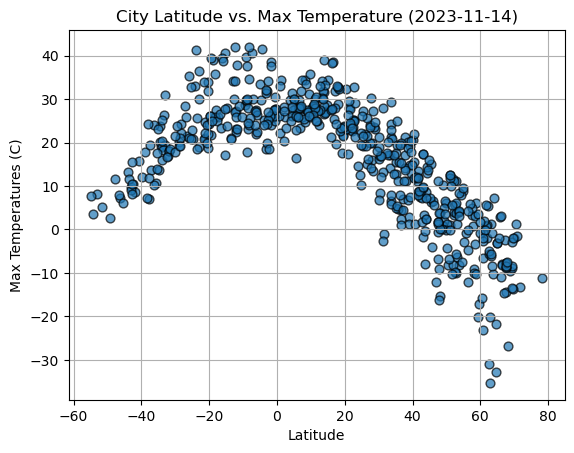

In [10]:
# Customize function to return the scatter plots for Latitude vs. Temperature
weather_plot('Lat', 'Max Temp')

#### Latitude Vs. Humidity

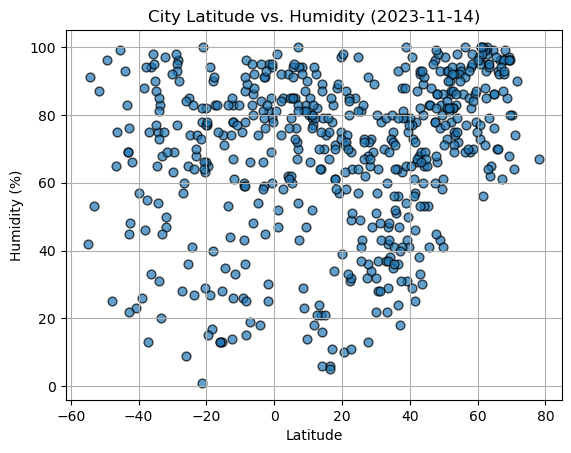

In [11]:
# Customize function to return the scatter plots for Latitude vs. Humidity
weather_plot('Lat', 'Humidity')

#### Latitude Vs. Cloudiness

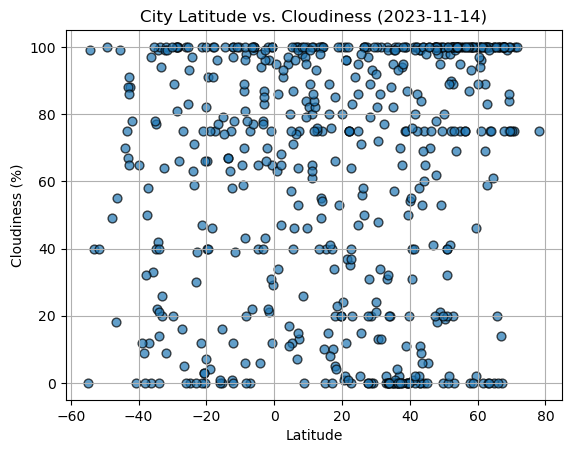

In [12]:
# Customize function to return the scatter plots for Latitude vs. Cloudiness
weather_plot('Lat', 'Cloudiness')

#### Latitude vs. Wind Speed Plot

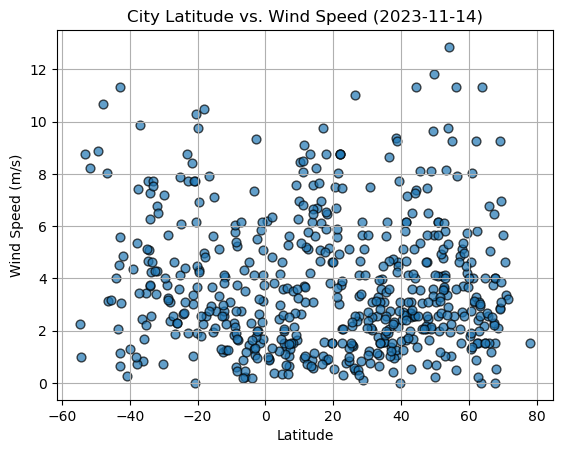

In [13]:
# Customize function to return the scatter plots for Latitude vs. Wind Speed
weather_plot('Lat', 'Wind Speed')

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,-7.77,96,100,4.02,RU,Tue Nov 14 11:19:03 2023
2,aasiaat,68.7098,-52.8699,-9.46,85,99,2.09,GL,Tue Nov 14 11:19:05 2023
3,along,28.1667,94.7667,15.95,65,89,0.85,IN,Tue Nov 14 11:19:06 2023
4,khandyga,62.6667,135.6000,-30.93,99,59,1.54,RU,Tue Nov 14 11:19:07 2023
8,otofuke,42.9917,143.2003,-1.69,82,11,2.53,JP,Tue Nov 14 11:19:10 2023


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,imbituba,-28.2400,-48.6703,24.36,96,100,2.37,BR,Tue Nov 14 11:19:04 2023
5,punta arenas,-53.1500,-70.9167,8.06,53,40,8.75,CL,Tue Nov 14 11:19:07 2023
6,san antonio de pale,-1.4014,5.6325,26.68,81,21,5.87,GQ,Tue Nov 14 11:19:08 2023
7,port-aux-francais,-49.3500,70.2167,2.71,96,100,8.88,TF,Tue Nov 14 11:19:09 2023
9,grytviken,-54.2811,-36.5092,3.47,91,99,0.99,GS,Tue Nov 14 11:19:10 2023


In [44]:
# Define a function to create Linear Regression plots
def weather_linregress_plot(x, y, df):
    
    
    # Build scatter plot for x vs. y
    df.plot(x, y, kind='scatter', s = 30)

    # Calculate Linear Regression
    (slope, intercept, rvalue, pvalue, stderr)= linregress(df[x], df[y])
    
    #Print r-value
    print(f"The r-value is: {rvalue}")

    # Linear Regression formular
    regress_line = (slope * df[x] ) + intercept

    # Plot Linear Regression line and annotate the equation on the plot
    plt.plot(df[x], regress_line, color = 'red')
    
    # If statements to determine if plot is for Northern Hemisphere or Southern Hemisphere
    if len(list(df[x]))== len(list(northern_hemi_df[x])):
        plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (45, 12), fontsize = 15, color = 'red')
    elif len(list(df[x]))== len(list(southern_hemi_df[x])):
        plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (-45, 10), fontsize = 15, color = 'red')

    # Incorporate the other graph properties and save the figure
    plt.xlabel("Latitude")
    if y == "Max Temp":
        plt.ylabel("Max Temperatures (C)")
        

    elif y == "Humidity":
        plt.ylabel("Humidity (%)")
        

    elif y == "Cloudiness":
        plt.ylabel("Cloudiness (%)")
        

    elif y == "Wind Speed":
        plt.ylabel("Wind Speed (m/s)")

    # Show plot
    plt.show()

    return

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8726627323236387


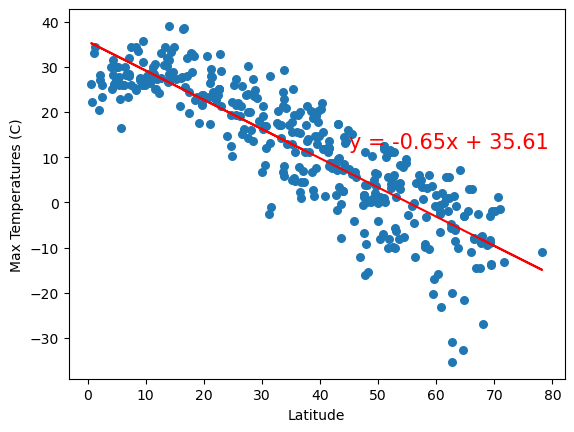

In [45]:
# Linear regression on Northern Hemisphere
weather_linregress_plot('Lat', 'Max Temp', northern_hemi_df)

The r-value is: 0.6926957200555972


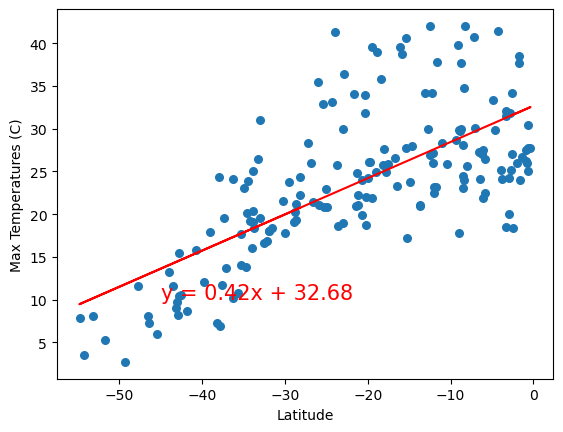

In [46]:
# Linear regression on Southern Hemisphere
weather_linregress_plot('Lat', 'Max Temp', southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3100750463972183


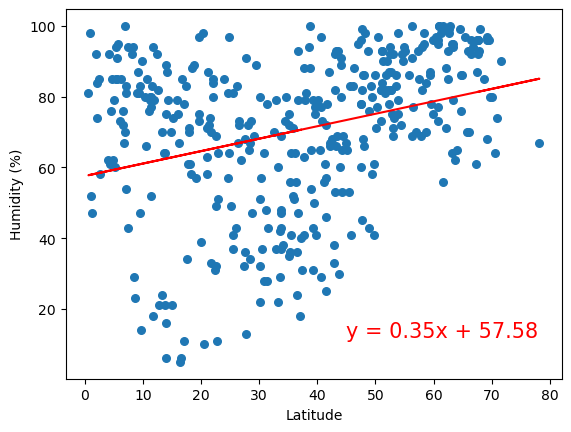

In [47]:
# Northern Hemisphere
weather_linregress_plot('Lat', 'Humidity', northern_hemi_df)

The r-value is: 0.019602745950695645


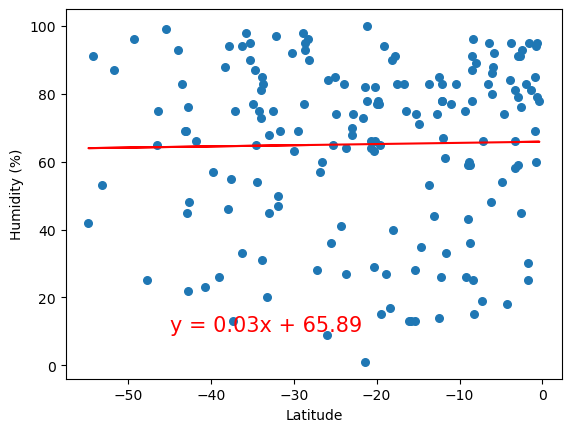

In [48]:
# Southern Hemisphere
weather_linregress_plot('Lat', 'Humidity', southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.140769442094745


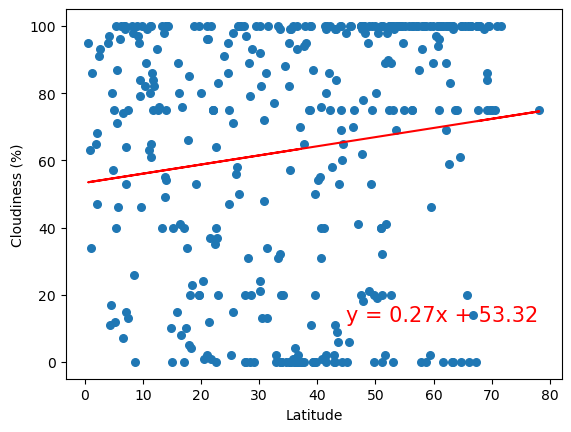

In [49]:
# Northern Hemisphere
weather_linregress_plot('Lat', 'Cloudiness', northern_hemi_df)

The r-value is: 0.10659465066527589


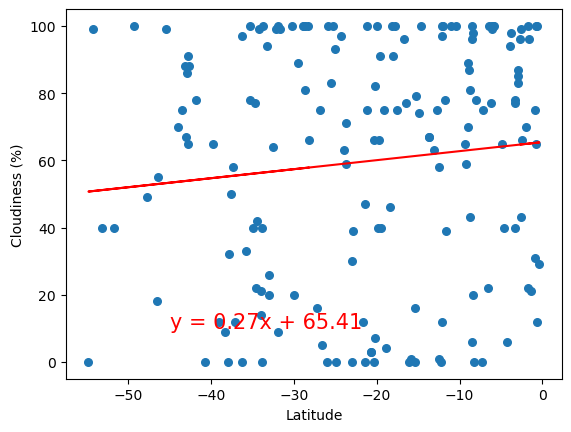

In [50]:
# Southern Hemisphere
weather_linregress_plot('Lat', 'Cloudiness', southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.024679282758214665


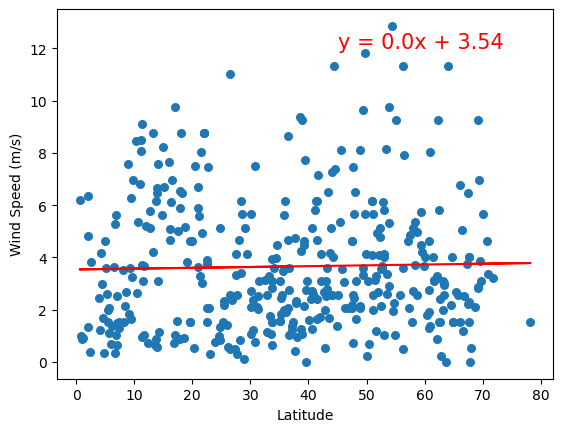

In [51]:
# Northern Hemisphere
weather_linregress_plot('Lat', 'Wind Speed', northern_hemi_df)

The r-value is: -0.25250276271275085


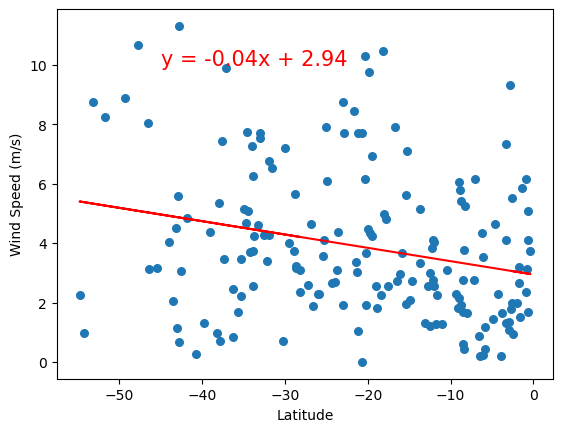

In [52]:
# Southern Hemisphere
weather_linregress_plot('Lat', 'Wind Speed', southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE